In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

/Users/gadamico/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [131]:
ms = pd.read_csv('mississippi_raw.csv')
la = pd.read_csv('louisiana_raw.csv')

# Mississippian Lower Respiratory Disease

In [66]:
y = ms['mx']

In [56]:
ms.columns

Index(['Unnamed: 0', 'location_name', 'sex', 'year_id', 'mx', 'lower', 'upper',
       'Climate', 'Rank_x', 'County', 'Population', 'Rank_y',
       'Per capita income', 'Median household income', 'Number of households',
       'Adams', 'Alcorn', 'Amite', 'Attala', 'Benton', 'Bolivar', 'Calhoun',
       'Carroll', 'Chickasaw', 'Choctaw', 'Claiborne', 'Clarke', 'Clay',
       'Coahoma', 'Copiah', 'Covington', 'DeSoto', 'Forrest', 'Franklin',
       'George', 'Greene', 'Grenada', 'Hancock', 'Harrison', 'Hinds', 'Holmes',
       'Humphreys', 'Issaquena', 'Itawamba', 'Jackson', 'Jasper', 'Jefferson',
       'JeffersonDavis', 'Jones', 'Kemper', 'Lafayette', 'Lamar', 'Lauderdale',
       'Lawrence', 'Leake', 'Lee', 'Leflore', 'Lincoln', 'Lowndes', 'Madison',
       'Marion', 'Marshall', 'Monroe', 'Montgomery', 'Neshoba', 'Newton',
       'Noxubee', 'Oktibbeha', 'Panola', 'PearlRiver', 'Perry', 'Pike',
       'Pontotoc', 'Prentiss', 'Quitman', 'Rankin', 'Scott', 'Sharkey',
       'Simpson', '

In [67]:
ms = ms.drop(columns = ['Unnamed: 0', 'County'])

In [68]:
# Let's be more specific about the 'Rank' column before we forget what it is!
ms = ms.rename({'Rank_x': 'Pop_Rank'}, axis = 1)
ms = ms.rename({'Rank_y': 'Per_Cap_Inc_Rank'}, axis = 1)

In [20]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8610 entries, 0 to 8609
Data columns (total 96 columns):
location_name              8610 non-null object
sex                        8610 non-null object
year_id                    8610 non-null int64
mx                         8610 non-null float64
lower                      8610 non-null float64
upper                      8610 non-null float64
Climate                    8610 non-null object
Pop_Rank                   8610 non-null int64
Population                 8610 non-null object
Per_Cap_Inc_Rank           8400 non-null float64
Per capita income          8400 non-null object
Median household income    8400 non-null object
Number of households       8400 non-null object
Adams                      8610 non-null int64
Alcorn                     8610 non-null int64
Amite                      8610 non-null int64
Attala                     8610 non-null int64
Benton                     8610 non-null int64
Bolivar                    8610 

In [69]:
ms['Per capita income'] = ms['Per capita income'].map(lambda x: int(str(x).replace('$', '').replace(',', '')))

ms['Median household income'] = ms['Median household income'].map(lambda x: int(str(x).replace('$', '').replace(',', '')))

ms['Number of households'] = ms['Number of households'].map(lambda x: int(str(x).replace(',', '')))

ms['Population'] = ms['Population'].map(lambda x: int(str(x).replace(',', '')))

In [70]:
sex_dums = pd.get_dummies(ms['sex'])
ms = pd.concat([ms, sex_dums], axis = 1)

ms = ms.drop(columns = ['sex'])

In [71]:
indices = ms.loc[ms['year_id'] < 2006].index
ms2 = ms.drop(indices)

In [73]:
test_columns = [col for col in ms2.columns if (col not in ['location_name', 'lower', 'upper',
                                                           'mx', 'Climate',
                                                           'Humid subtropical'])]
X = ms2[test_columns]
y = ms2['mx']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [117]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [118]:
lr = LinearRegression().fit(X_train, y_train)

In [119]:
lr.score(X_test, y_test)

0.9026251113118031

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

rf = RandomForestRegressor().fit(X_train, y_train)

rf.score(X_test, y_test)

0.9728509892245284

In [75]:
ms.corr()['mx'].nlargest(10)

mx         1.000000
upper      0.994122
lower      0.993344
Male       0.598151
Stone      0.185500
Jones      0.161914
Bolivar    0.156361
year_id    0.149122
Sharkey    0.135843
Marion     0.122895
Name: mx, dtype: float64

In [76]:
ms.corr()['mx'].nsmallest(10)

Female      -0.511724
Amite       -0.116763
Choctaw     -0.116341
Carroll     -0.115626
Calhoun     -0.114013
Lafayette   -0.108705
Both        -0.086426
Newton      -0.086212
Franklin    -0.085508
Kemper      -0.076084
Name: mx, dtype: float64

What matters here is sex: Being male is positively correlated with lower respiratory mortality; being female is negatively correlated with mortality.

This extensive report (https://msdh.ms.gov/msdhsite/_static/resources/4775.pdf) from 2014 shows that the cardiovascular disease death rate is the highest in the nation. Also, obesity and smoking have very high rates.

## Neural Network

In [77]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [108]:
model = Sequential()
model.add(Dense(80, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1)) # default: activation = None

In [109]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [110]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20, batch_size = 16)

Train on 1660 samples, validate on 554 samples
Epoch 1/20
1660/1660 [==============================] - 1s 451us/step - loss: 271303.3104 - val_loss: 1653.6839
Epoch 2/20
1660/1660 [==============================] - 0s 131us/step - loss: 606.3611 - val_loss: 1653.3665
Epoch 3/20
1660/1660 [==============================] - 0s 135us/step - loss: 367.9425 - val_loss: 1652.9721
Epoch 4/20
1660/1660 [==============================] - 0s 148us/step - loss: 272.1107 - val_loss: 1652.4075
Epoch 5/20
1660/1660 [==============================] - 0s 138us/step - loss: 222.8554 - val_loss: 1651.7941
Epoch 6/20
1660/1660 [==============================] - 0s 133us/step - loss: 164.7050 - val_loss: 1650.9654
Epoch 7/20
1660/1660 [==============================] - 0s 131us/step - loss: 140.2223 - val_loss: 1649.9363
Epoch 8/20
1660/1660 [==============================] - 0s 132us/step - loss: 144.0724 - val_loss: 1648.8759
Epoch 9/20
1660/1660 [==============================] - 0s 154us/step - loss: 

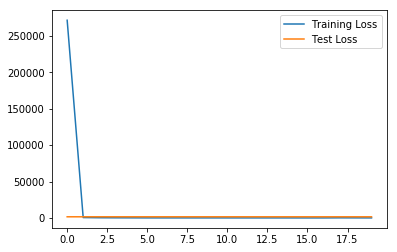

In [111]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend()

# Louisianan Meningitis

In [132]:
y = la['mx']

In [133]:
la.columns

Index(['Unnamed: 0', 'location_name', 'sex', 'year_id', 'mx', 'lower', 'upper',
       'Climate', 'Rank_x', 'County', 'Population', 'Rank_y', 'Parish',
       'Per capita income', 'Median household income', 'Median family income',
       'Number of households', 'Acadia', 'Allen', 'Ascension', 'Assumption',
       'Avoyelles', 'Beauregard', 'Bienville', 'Bossier', 'Caddo', 'Calcasieu',
       'Caldwell', 'Cameron', 'Catahoula', 'Claiborne', 'Concordia', 'DeSoto',
       'EastBatonRouge', 'EastCarroll', 'EastFeliciana', 'Evangeline',
       'Franklin', 'Grant', 'Iberia', 'Iberville', 'Jackson', 'Jefferson',
       'JeffersonDavis', 'LaSalle', 'Lafayette', 'Lafourche', 'Lincoln',
       'Livingston', 'Madison', 'Morehouse', 'Natchitoches', 'Orleans',
       'Ouachita', 'Plaquemines', 'PointeCoupee', 'Rapides', 'RedRiver',
       'Richland', 'Sabine', 'St.Bernard', 'St.Charles', 'St.Helena',
       'St.James', 'St.JohntheBaptist', 'St.Landry', 'St.Martin', 'St.Mary',
       'St.Tammany', '

In [134]:
la = la.drop(columns = ['Unnamed: 0', 'Parish'])

In [138]:
la['Per capita income'] = la['Per capita income'].map(lambda x: int(str(x).replace('$', '').replace(',', '')))

la['Median household income'] = la['Median household income'].map(lambda x: int(str(x).replace('$', '').replace(',', '')))

la['Median family income'] = la['Median family income'].map(lambda x: int(str(x).replace('$', '').replace(',', '')))

la['Number of households'] = la['Number of households'].map(lambda x: int(str(x).replace(',', '')))

In [139]:
la = la.rename({'Rank_x': 'Pop_Rank', 'Rank_y': 'Per_Cap_Inc_Rank'}, axis = 1)

In [141]:
sex_dums = pd.get_dummies(la['sex'])
la = pd.concat([la, sex_dums], axis = 1)

la = la.drop(columns = ['sex'])

In [142]:
la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6720 entries, 0 to 6719
Data columns (total 82 columns):
location_name              6720 non-null object
year_id                    6720 non-null int64
mx                         6720 non-null float64
lower                      6720 non-null float64
upper                      6720 non-null float64
Climate                    6720 non-null object
Pop_Rank                   6720 non-null int64
County                     6720 non-null object
Population                 6720 non-null object
Per_Cap_Inc_Rank           6720 non-null int64
Per capita income          6720 non-null int64
Median household income    6720 non-null int64
Median family income       6720 non-null int64
Number of households       6720 non-null int64
Acadia                     6720 non-null int64
Allen                      6720 non-null int64
Ascension                  6720 non-null int64
Assumption                 6720 non-null int64
Avoyelles                  6720 non-n

In [143]:
la['Population'] = la['Population'].map(lambda x: int(x.replace(',', '')))

## Linear Regression

In [144]:
indices = la.loc[la['year_id'] < 2006].index
la2 = la.drop(indices)

In [145]:
test_columns = [col for col in la2.columns if (col not in ['location_name', 'lower', 'upper',
                                                           'mx', 'Climate', 'County'])]
X = la2[test_columns]
y = la2['mx']

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [147]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [148]:
lr = LinearRegression().fit(X_train_scaled, y_train)

In [149]:
lr.score(X_test_scaled, y_test)

0.9078964675947296

## Random Forest

In [150]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9507386015090143

## Exploring Correlations

In [152]:
la.corr()['mx'].nlargest(10)

mx                  1.000000
upper               0.997955
lower               0.997843
Male                0.271616
Orleans             0.169952
Per_Cap_Inc_Rank    0.155723
EastCarroll         0.116157
Madison             0.087350
Tensas              0.079331
Pop_Rank            0.068862
Name: mx, dtype: float64

In [153]:
la.corr()['mx'].nsmallest(10)

year_id                   -0.830463
Female                    -0.255940
Median household income   -0.213351
Median family income      -0.202018
Per capita income         -0.151198
St.Tammany                -0.087181
Cameron                   -0.082415
Livingston                -0.073913
Bossier                   -0.073152
LaSalle                   -0.072265
Name: mx, dtype: float64

Year is quite significant here. So things really have improved dramatically over the last 35 years. Wikipedia points out (https://en.wikipedia.org/wiki/Meningococcal_vaccine) that there were several meningococcal vaccines developed in the late 1970s and early 1980s. There are marginally relevant values for male/female (higher rates for men) and for the median income predictors.

## Neural Network

In [159]:
model = Sequential()
model.add(Dense(35, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1))

In [160]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [161]:
history = model.fit(X_train_scaled, y_train, validation_data = (X_test_scaled, y_test), epochs = 10, batch_size = 16)

Train on 1296 samples, validate on 432 samples
Epoch 1/10
1296/1296 [==============================] - 1s 565us/step - loss: 0.1066 - val_loss: 0.0254
Epoch 2/10
1296/1296 [==============================] - 0s 133us/step - loss: 0.0143 - val_loss: 0.0074
Epoch 3/10
1296/1296 [==============================] - 0s 134us/step - loss: 0.0057 - val_loss: 0.0039
Epoch 4/10
1296/1296 [==============================] - 0s 129us/step - loss: 0.0036 - val_loss: 0.0027
Epoch 5/10
1296/1296 [==============================] - 0s 141us/step - loss: 0.0028 - val_loss: 0.0022
Epoch 6/10
1296/1296 [==============================] - 0s 143us/step - loss: 0.0023 - val_loss: 0.0019
Epoch 7/10
1296/1296 [==============================] - 0s 127us/step - loss: 0.0019 - val_loss: 0.0016
Epoch 8/10
1296/1296 [==============================] - 0s 130us/step - loss: 0.0017 - val_loss: 0.0013
Epoch 9/10
1296/1296 [==============================] - 0s 132us/step - loss: 0.0015 - val_loss: 0.0011
Epoch 10/10
1296/

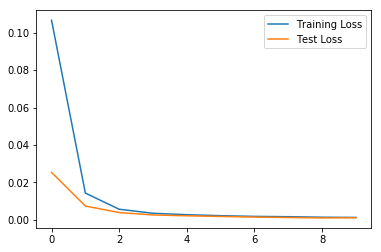

In [162]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend()

An especially good neural network here.